# Resolução lista 8: Métodos Iterativos para Sistema Lineares e Redução de Dados


## Exercício 1

As 3 funções abaixo foram incluídas na biblioteca de funções do grupo:

  `- COMPRESSÃO`  
  `- GAUSS-JACOBI`  
  `- GAUSS-SEIDEL`

Como as mesmas são utilizadas no decorrer da resolução de outras questões da lista, optamos por deixar o código das funções neste notebook também.

In [511]:
import Pkg; 

Pkg.add("Images")

using LinearAlgebra
using Images
using Printf
using Plots

  Resolving package versions...
No Changes to `C:\Users\carla\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\carla\.julia\environments\v1.5\Manifest.toml`


### Função Compressão

In [512]:
"""
RESUMO: É um método que dada uma matriz A, diminuirmos o tamanho delas através do cálculo de valores de c
        respeitando o modelo A = A-b*c', para conseguir várias matrizes até o posto desejado pelo usuário.
ENTRADA: matriz A e o nível de compressão
SAIDA: matriz B e matriz C
"""
# Retorna a melhor coordenada, tal que norm(A-b*c') é mínima
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m,n=size(A)
    A=1.0*A
    c=zeros(n,1)
    c=A'*(b/(b'*b))
    return c
end

# Faz cálculo b, c através das melhores coordenadas
function calculo_cb(A; limite = 22)
    n,m=size(A)

    b=randn(n,1)
    c=randn(m,1)
    
    btemp=randn(m,1)
    ctemp=randn(n,1)
    
    for i=1:limite
        c=melhores_coords(A,b)
        btemp=c
        ctemp=melhores_coords(A',btemp)
        b=ctemp
    end
    
    return b,c
end

# Função compressão
function compressao(A,nivel)
    m,n=size(A)
    B=zeros(m,nivel)
    C=zeros(n,nivel)
    
    for i=1:nivel
        B[:,i],C[:,i]=calculo_cb(A)
        A=A-B[:,i]*C[:,i]'
    end
    return B,C
end

compressao (generic function with 1 method)

In [513]:
#Exemplo 1
A = [1 2 1 11 101 2 10; 1 2 2 12 102 3  20;1 2 3 13 103 4 30]
B, C =compressao(A, 2)
print("O erro é de $(norm(A-B*C'))")

O erro é de 1.542371118540254e-14

In [514]:
#Exemplo 2
A = [22 17 15 12 100 120;44 18 30 13 120 100;66 19 45 14 150 90]
B,C = compressao(A, 3)
print("O erro é de $(norm(A-B*C'))")

O erro é de 2.5803073537982523e-14

In [515]:
#Exemplo 3
A = [3.0 6.0 9.0 12.0 15.0; 6.0 7.0 8.0 9.0 10.0; 10.0 20.0 30.0 40.0 50.0; 12.0 13.0 14.0 15.0 16.0]
B,C = compressao(A, 2)
print("O erro é de $(norm(A-B*C'))")

O erro é de 8.343678738167853e-15

In [516]:
A = rand(1:100, 5,3)
rank(A)

3

### Função Gauss-Jacobi

In [517]:
"""
RESUMO: É um método iterativo para resolução de sistemas de equações lineares de forma Ax = b.
        Tem como condição suficiente de convergência que a matriz seja estritamente diagonal dominante.
        Converge para matrizes diagonais dominantes.
ENTRADA:Uma matriz A e uma matriz b
SAIDA: uma matriz x, com o resultado da equação linear
"""
function gauss_jacobi(A,b; limite= 400)
    n,m=size(A)
    M=Diagonal(A) #Pegando a Diagonal de A
    K=M-A  #Quebrando a matriz A em M -K, sendo M, a sua diagonal, pois essa é mais barata de se calcular
    R=inv(M)*K 
    c=inv(M)*b
    
    x=zeros(n,1) #Chute inicial
    for i=1:limite
        x=R*x+c
    end
    
    return x
end

gauss_jacobi

In [518]:
#Exemplo 1
A = [10.0 2.0 3.0;4.5 15.0 12.5;10 15 35]
x = [15;11;20]
b = A*x
x_final = gauss_jacobi(A,b)
norm(x - x_final)

1.0658141036401503e-14

In [519]:
#Exemplo 2
A = [27.0 15.0 18.0;21.5 45.45 10.1;11 75 105]
x = [27;1;21]
b = A*x
x_final = gauss_jacobi(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [27, 1, 21] 
O valor do x encontrado foi [26.999999999999986; 1.0; 20.999999999999993] 
O erro é próximo de 1.5888218580782548e-14

In [520]:
#Exemplo 3
A = [44.001 77.12 28.0;2.5 79.002 3.7;11.01 110.10 22.1]
x = [27;11;1]
b = A*x
x_final = gauss_jacobi(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [27, 11, 1] 
O valor do x encontrado foi [26.999999999999993; 10.999999999999998; 1.0] 
O erro é próximo de 7.32410687763558e-15

### Função Gauss-Seidel

In [521]:
"""
RESUMO: É um método iterativo para resolução de sistemas de equações lineares. 
        Tem como condição suficiente de convergência que a matriz seja estritamente diagonal dominante.
ENTRADA:Uma matriz A e uma matriz b
SAIDA: uma matriz x, com o resultado da equação linear
"""
function gauss_seidel(A,b; limite=400)
    n,m=size(A)
    M=UpperTriangular(A) #Calculando o triangular superior e salvando em M
    K=M-A     
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior, pois essa é mais barata de se calcular
    R=inv(M)*K
    c=inv(M)*b
    
    x=zeros(n,1) #chute inicial
    for i=1:limite
        x=R*x+c 
    end
    
    return x
end

gauss_seidel

In [522]:
#Exemplo 1
A = [15.0 1.8 1.0;1.5 25.15 11.1;0.01 55 75]
x = [5;6;7]
b = A*x
x_final = gauss_seidel(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [5, 6, 7] 
O valor do x encontrado foi [5.0; 5.999999999999999; 7.0] 
O erro é próximo de 8.881784197001252e-16

In [523]:
#Exemplo 2
A = [15.58158 -1.622 1.1196 0.613; 1.250 3.420 -0.662 0.1446; 1.5964 0.571137 5.13785854 -0.827872; 1.07690677 0.19946388 1.003 -0.18519343]
x = randn(4,1)
b = A*x
x_final = gauss_seidel(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [0.17362952876078885; 1.2019984588431532; 0.31642420125803083; -0.9634470633469489] 
O valor do x encontrado foi [0.17362952876078885; 1.201998458843153; 0.3164242012580307; -0.9634470633469494] 
O erro é próximo de 6.080941944488118e-16

In [524]:
#Exemplo 3
A = [0.44232843419610957 0.975168270793521 0.4057316291542512 0.43141972827505626; 0.05176629292410739 0.6326306259870371 0.17408718829624203 0.216193281992759; 0.4930982825005519 0.8217543935748945 0.9028708230733111 0.5851496265616856; 0.4336333792828273 0.03710455313190231 0.5436617314521639 0.8655115805195281]
x = [-0.04343778216875846; -1.1871517960515228; 0.9565556126856019; -0.6580960721098263]
b = A*x
x_final = gauss_seidel(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [-0.04343778216875846, -1.1871517960515228, 0.9565556126856019, -0.6580960721098263] 
O valor do x encontrado foi [-0.04343778216875849; -1.1871517960515228; 0.9565556126856025; -0.6580960721098268] 
O erro é próximo de 8.010741897413915e-16

## Exercício 2

In [525]:
gr(size =(600,400) )
plot(rand(1), rand(1))
scatter!(rand(1), rand(1))
nothing

In [526]:
"""
Sabendo que { 2x₁ + x₂ = 2; −x₁ + 2x₂ = 2}, pode ser escrito como A = [2 1;-1 2] e b = [2;2]
"""
function gauss_seidel_com_erro(A,b; max_iter=1000, ϵ = 1e-3)
    n,m=size(A)
    x1s = []
    x2s = []
    M=UpperTriangular(A) #Calculando o triangular superior e salvando em M
    K=M-A     
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior, pois essa é mais barata de se calcular
    R=inv(M)*K
    c=inv(M)*b
    x=zeros(n,1) #chute inicial
    x=R*x+c
    x_anterior = x
    append!(x1s, x[1])
    append!(x2s, x[2])
    x=R*x+c 
    iter =0 
    resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
    cansado = (iter ≥ max_iter)
    while !(resolvido || cansado) 
        x_anterior = x
        append!(x1s, x[1])
        append!(x2s, x[2])
        x=R*x+c 
        iter +=1
        #print(x, "\n", x_anterior)
        resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
        cansado = (iter ≥ max_iter)
        
    end
    print("O erro final ficou em $(abs(norm(x-x_anterior)))\n")
    print("O resultado final ficou em $x\n")
    return x1s, x2s
end

function gauss_jacobi_com_erro(A,b; max_iter=1000, ϵ = 1e-3)
    n,m=size(A)
    x1s = []
    x2s = []
    M=Diagonal(A) #Calculando o triangular superior e salvando em M
    K=M-A     
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior, pois essa é mais barata de se calcular
    R=inv(M)*K
    c=inv(M)*b
    x=zeros(n,1) #chute inicial
    x=R*x+c
    x_anterior = x
    append!(x1s, x[1])
    append!(x2s, x[2])
    x=R*x+c 
    iter =0 
    resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
    cansado = (iter ≥ max_iter)
    while !(resolvido || cansado) 
        x_anterior = x
        append!(x1s, x[1])
        append!(x2s, x[2])
        x=R*x+c 
        iter +=1
        #print(x, "\n", x_anterior)
        resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
        cansado = (iter ≥ max_iter)
        
    end
    print("O erro final ficou em $(abs(norm(x-x_anterior)))\n")
    print("O resultado final ficou em $x\n")
    return x1s, x2s
end

gauss_jacobi_com_erro (generic function with 1 method)

In [527]:
A = [2 1;-1 2] 
b = [2;2]
print("GAUSS_SEIDEL\n")
X_seidel,Y_seidel = gauss_seidel_com_erro(A,b)
X_seidel = X_seidel*1.0
Y_seidel = Y_seidel*1.0
print("\nGAUSS_JACOBI")
X_jacobi,Y_jacobi = gauss_jacobi_com_erro(A,b)
X_jacobi = X_jacobi*1.0
Y_jacobi = Y_jacobi*1.0
print("\n")

GAUSS_SEIDEL
O erro final ficou em 0.0002729575167846423
O resultado final ficou em [0.4000244140625; 1.199951171875]

GAUSS_JACOBIO erro final ficou em 0.0006905339660024879
O resultado final ficou em [0.39990234375; 1.19970703125]



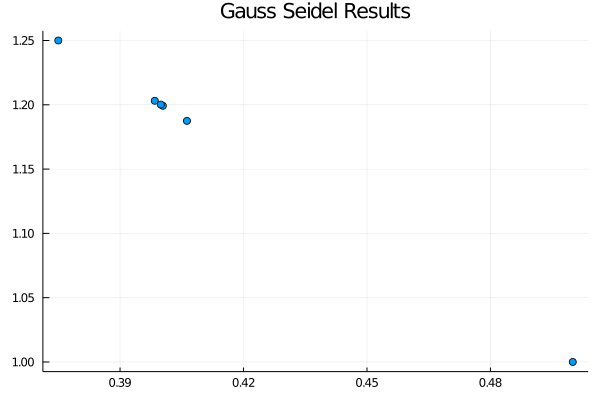

In [528]:
scatter(X_seidel,Y_seidel,leg=false, title="Gauss Seidel Results")

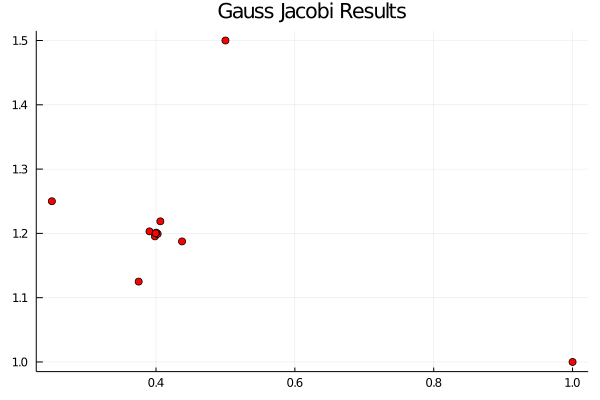

In [529]:
scatter(X_jacobi,Y_jacobi,color="red",leg=false, title="Gauss Jacobi Results")

## Exercício 3

### (a)

### (b)
Uma matriz é diagonal dominante se os modulos dos valores na diagonal sao maiores do que a soma dos modulos dos outros elementos nas respectivas linhas.

Nessa matriz sempre temos o valor 4 na diagonal. Em todas as linhas, temos sempre o valor 0 e duas vezes o valor -1.

Logo, |0| + |-1| + |-1| = 0 + 1 + 1 = 2 < 4.

Logo, a matriz é diagonal dominante.

### (c) 

In [530]:
function gauss_seidel_Q3(A,b; max_iter=1000, ϵ = 1e-3)
    n, m = size(A)
    
    #Calculando o triangular superior e salvando em M
    M = UpperTriangular(A) 
    K = M - A     
    
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior
    # pois essa é mais barata de se calcular
    R = inv(M) * K
    c = inv(M) * b
    
    #chute inicial
    x = zeros(n,1)
    x_anterior = x
    x = R * x + c

    # condicoes de parada
    iter = 1
    resolvido = (abs(norm(x - x_anterior)) ≤ ϵ)
    cansado = (iter ≥ max_iter)
    
    while !(resolvido || cansado) 
        x_anterior = x
        x=R*x+c 
        iter +=1
        resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
        cansado = (iter ≥ max_iter)
    end
    print("A tolerância final ficou em $(abs(norm(x-x_anterior)))\n")
    print("O resultado final ficou em $x\n")
    return x
end

gauss_seidel_Q3 (generic function with 1 method)

In [531]:
function gauss_jacobi_Q3(A,b; max_iter=1000, ϵ = 1e-3)
    n, m = size(A)
    
    #Calculando o triangular superior e salvando em M
    M = Diagonal(A) 
    K = M - A     
    
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior
    # pois essa é mais barata de se calcular
    R = inv(M) * K
    c = inv(M) * b
    
    #chute inicial
    x = zeros(n,1)
    x_anterior = x
    x = R * x + c
    
    # condicoes de parada
    iter = 1
    resolvido = (abs(norm(x - x_anterior)) ≤ ϵ)
    cansado = (iter ≥ max_iter)
    
    while !(resolvido || cansado) 
        x_anterior = x
        x=R*x+c 
        iter +=1
        resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
        cansado = (iter ≥ max_iter)
    end
    print("A tolerância final ficou em $(abs(norm(x-x_anterior)))\n")
    print("O resultado final ficou em $x\n")
    return x
end

gauss_jacobi_Q3 (generic function with 1 method)

In [532]:
A = [ 4 -1 -1  0;
     -1  4  0 -1;
     -1  0  4 -1;
      0 -1 -1  4]

4×4 Array{Int64,2}:
  4  -1  -1   0
 -1   4   0  -1
 -1   0   4  -1
  0  -1  -1   4

In [533]:
b = [20, 50, 15, 45]

4-element Array{Int64,1}:
 20
 50
 15
 45

In [534]:
gauss_seidel_Q3(A,b)

A tolerância final ficou em 0.0006079673767089844
O resultado final ficou em [13.124959468841553; 20.624918937683105; 11.874918937683105; 19.37483787536621]


4×1 Array{Float64,2}:
 13.124959468841553
 20.624918937683105
 11.874918937683105
 19.37483787536621

In [535]:
gauss_jacobi_Q3(A,b)

A tolerância final ficou em 0.0009918212890625
O resultado final ficou em [13.124504089355469; 20.62450408935547; 11.874504089355469; 19.37450408935547]


4×1 Array{Float64,2}:
 13.124504089355469
 20.62450408935547
 11.874504089355469
 19.37450408935547

### (d)

In [536]:
# codigo julia

### (e)

In [537]:
# codigo julia

## Exercício 4

In [538]:
# Construir matriz A
A = zeros(8,8)
for i = 1:8
    A[i,i] = 1.0
end

A[4,1] = -1.0
A[5,3] = -1.0
A[6,4] = -1.0
A[6,2] = -1.0
A[7,5] = -1.0
A[8,6] = -1.0
A[8,7] = -1.0

A

8×8 Array{Float64,2}:
  1.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0
  0.0   1.0   0.0   0.0   0.0   0.0   0.0  0.0
  0.0   0.0   1.0   0.0   0.0   0.0   0.0  0.0
 -1.0   0.0   0.0   1.0   0.0   0.0   0.0  0.0
  0.0   0.0  -1.0   0.0   1.0   0.0   0.0  0.0
  0.0  -1.0   0.0  -1.0   0.0   1.0   0.0  0.0
  0.0   0.0   0.0   0.0  -1.0   0.0   1.0  0.0
  0.0   0.0   0.0   0.0   0.0  -1.0  -1.0  1.0

In [539]:
# Cada elemento de b é a soma das demandas com valores explicitos
# associados a uma junta A,B,C...
b = [7000, 3500, 9000, 30000, 3000, 0, 3000, 500]

8-element Array{Int64,1}:
  7000
  3500
  9000
 30000
  3000
     0
  3000
   500

In [540]:
# O método converge, mesmo sem respeitar o critério das linhas
gauss_seidel_Q3(A,b)

A tolerância final ficou em 0.0
O resultado final ficou em [7000.0; 3500.0; 9000.0; 37000.0; 12000.0; 40500.0; 15000.0; 56000.0]


8×1 Array{Float64,2}:
  7000.0
  3500.0
  9000.0
 37000.0
 12000.0
 40500.0
 15000.0
 56000.0

In [541]:
# O método converge, mesmo sem respeitar o critério das linhas
gauss_jacobi_Q3(A,b)

A tolerância final ficou em 0.0
O resultado final ficou em [7000.0; 3500.0; 9000.0; 37000.0; 12000.0; 40500.0; 15000.0; 56000.0]


8×1 Array{Float64,2}:
  7000.0
  3500.0
  9000.0
 37000.0
 12000.0
 40500.0
 15000.0
 56000.0

### (b)

In [542]:
# codigo julia

## Exercício 5

Abaixo determinaremos uma matriz M de posto 1 (tal que $M = bc^T$) que melhor representa a matriz A e o erro para:

### (a) $
\begin{bmatrix}
0 & 1 & 3 \\
3 & 1 & 0 \\
\end{bmatrix}
$

In [543]:
A = [0 1 3;
     3 1 0]

2×3 Array{Int64,2}:
 0  1  3
 3  1  0

In [544]:
function melhorMatrizM(A)
    n,m = size(A)
    erroFinal = 0.0

    b1 = randn(n,1)
    c1 = randn(m,1)
    
    b2 = randn(m,1)
    c2 = randn(n,1)
    
    erro1 = norm(A-b1*c1')
    print("Erro inicial: ", erro1, "\n")
    
    for i = 1:50
        c1 = melhores_coords(A,b1) # Acha melhores coordenadas para A
        b2 = c1 # Trocamos de mundo e colocamos base no lugar de coordenada e vice-versa (aqui queremos minimizar o erro ||A'-b'c||)
        c2 = melhores_coords(A',b2) # Acha melhpres coordenadas para A'
        b1 = c2 # Trocamos de mundo novamente para retornamos ao mundo ininicial (onde queremos minimizar o erro ||A-bc'||)
        
        erroFinal = norm(A'-b2*c2')
        
        # Erros de b e c no mundo 2, onde trocamos base por coordenadas e vice-versa
        #      A              |           A'
        # norm(A-b*c') <- é igual a -> norm(A'-b'*c)
        #erro2 = norm(A'-b2*c2')
        #print(erro2, "\n")
    end
    print("Erro final: ", erroFinal, "\n")
    
    return b1,c1
end

melhorMatrizM (generic function with 1 method)

In [545]:
b,c = melhorMatrizM(A)

Erro inicial: 4.879800041634493
Erro final: 3.000000003757359


([-0.7745346674187515; -0.7746834456729291], [-1.9366879763483376; -1.290973789006744; -1.9362333906718947])

In [546]:
# Vetor b dividido pela primeira coordenada
b/b[1]

2×1 Array{Float64,2}:
 1.0
 1.0001920872756715

In [547]:
# Vetor c' multiplicado pela primeira coordenada
c'*b[1]

1×3 Array{Float64,2}:
 1.50003  0.999904  1.49968

In [548]:
# Para reconstruir a matriz A, aproximadamente, temos a matriz M = bc'
M = b*c'

2×3 Array{Float64,2}:
 1.50003  0.999904  1.49968
 1.50032  1.0001    1.49997

In [549]:
print("Erro de M: ", norm(A-b*c'))

Erro de M: 3.000000003757359

Abaixo determinaremos uma matriz M de posto 1 (tal que $M = bc^T$) que melhor representa a matriz A e o erro para:

### (b) $
\begin{bmatrix}
0 & 1 & 3 & 2\\
2 & 3 & 1 & 0\\
\end{bmatrix}
$


In [550]:
A = [0 1 3 2;
     2 3 1 0]

2×4 Array{Int64,2}:
 0  1  3  2
 2  3  1  0

In [551]:
b,c = melhorMatrizM(A)

Erro inicial: 6.199893650137219
Erro final: 2.8284271247461903


([-1.1600364908441128; -1.160036490844113], [-0.8620418477287206; -1.7240836954574412; -1.7240836954574408; -0.8620418477287204])

In [552]:
# Vetor b dividido pela primeira coordenada
b/b[1]

2×1 Array{Float64,2}:
 1.0
 1.0000000000000002

In [553]:
# Vetor c' multiplicado pela primeira coordenada
c'*b[1]

1×4 Array{Float64,2}:
 1.0  2.0  2.0  1.0

In [554]:
# Para reconstruir a matriz A, aproximadamente, temos a matriz M = bc'
M = b*c'

2×4 Array{Float64,2}:
 1.0  2.0  2.0  1.0
 1.0  2.0  2.0  1.0

In [555]:
print("Erro de M: ", norm(A-b*c'))

Erro de M: 2.8284271247461903

### (c) 
A representação gráfica das soluções acima nos desenhos citados na lista é uma reta que minimiza a diferença entre todos esses pontos e a reta (projeção ortogonal). Em outras palavras, a solução gráfica é uma única reta que contém N vetores (posto 1) que mais se aproximam dos N pontos passados.

## Exercício 6

Consideraremos a bandeira da grécia como uma imagem preta e branca modelada na matriz A abaixo:

Considerando 0 como a cor preto e 1 a cor branco, temos:

$
\begin{bmatrix}
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
    0 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
    1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$

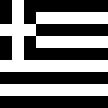

3

In [556]:
greece = [0   1   0   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          1   1   1   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          0   1   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ]

display(Gray.(greece))
rank(greece)

### (a)
O posto da bandeira da Grécia, tal que $A = BC^T$ é igual a 3, ou seja, com 3 colunas da bandeira, conseguimos reconstruir completamente a bandeira original (sem perdas).

No caso da bandeira da Grécia, a matriz B representa pedaços verticais do desenho da bandeira que se repetem de intervalos verticais em intervalos verticais da bandeira. Em outras palavras, com 3 faixas verticais da bandeira, conseguimos fazer algumas repetições até que a bandeira esteja completa.

### (b)
Dois países tais quais sua bandeira tem posto = 1:
- Alemanha
- Austria

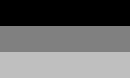

1

In [557]:
germany = [0    0    0    0    0   ; # preto
           0.5  0.5  0.5  0.5  0.5 ; # vermelho
           0.75 0.75 0.75 0.75 0.75] # amarelo

display(Gray.(germany))
rank(germany)

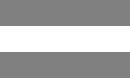

1

In [558]:
austria = [0.5 0.5 0.5 0.5 0.5; # vermelho
           1   1   1   1   1  ; # branco
           0.5 0.5 0.5 0.5 0.5] # vermelho

display(Gray.(austria))
rank(austria)

### (c)
Dois países tais quais sua bandeira tem posto = 2:
- Nigéria
- Finlândia

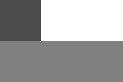

2

In [559]:
chile = [0.3  1    1   ; # azul / branco
         0.5  0.5  0.5 ] # vermelho  

display(Gray.(chile))
rank(chile)

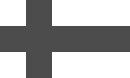

2

In [560]:
finland = [1    0.3  1    1    1   ; # branco / azul  / branco
           0.3  0.3  0.3  0.3  0.3 ; # azul
           1    0.3  1    1    1   ] # branco / azul  / branco

display(Gray.(finland))
rank(finland)

### (d)
Dois países tais quais sua bandeira tem posto = 3:
- Suíça
- Grécia

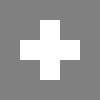

3

In [561]:
switz = [0.5  0.5  0.5  0.5  0.5 ; # vermelho
         0.5  0.5  1    0.5  0.5 ; # vermelho / branco / vermelho
         0.5  1    1    1    0.5 ; # vermelho / branco / vermelho
         0.5  0.5  1    0.5  0.5 ; # vermelho / branco / vermelho
         0.5  0.5  0.5  0.5  0.5 ] # vermelho

display(Gray.(switz))
rank(switz)

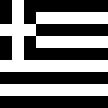

In [562]:
greece = [0   1   0   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          1   1   1   0   0   0   0   0   0 ;
          0   1   0   1   1   1   1   1   1 ;
          0   1   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ;
          1   1   1   1   1   1   1   1   1 ;
          0   0   0   0   0   0   0   0   0 ]

Gray.(greece)

## Exercício 7

Considere a imagem dada.

a) Insira esta imagem em uma matriz 5x5. Na imagem, 0 representa a cor preta, 0.5 a cor cinza e 1 representa a cor branca.

b) Qual é o posto da imagem?

c) Faça compressão de dados nível 1, 2, 3, 4 e 5 e imprima na tela com os seus erros.

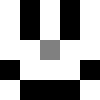

In [563]:
# a) Imagem em matriz 5x5

img = [
    1   0   1   0   1 ;
    1   0   1   0   1 ;
    1   1  0.5  1   1 ;
    0   1   1   1   0 ;
    1   0   0   0   1 ;
]

Gray.(img)

b) Posto da imagem

A imagem tem posto 3.

O posto de uma matriz é o número de linhas (ou colunas) linearmente independentes da matriz. Podemos descobrir o posto fazendo o escalonamento da matriz e verificando o número de linhas não nulas. Um problema que se encontra ao fazer isso neste exemplo, é que nos deparamos com a necessidade de realizar trocas de linhas. Como estamos tratando de um exemplo simples em uma imagem verticalmente simétrica, é trivial reconhecer as colunas linearmente independentes.

$
\begin{bmatrix}
1 & 0 & 1 & 0 & 1  \\
1 & 0 & 1 & 0 & 1  \\
1 & 1 & 0.5 & 1 & 1  \\
0 & 1 & 1 & 1 & 0  \\
1 & 0 & 0 & 0 & 1  \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 1 \\
1 & 0 & 1 \\ 
1 & 1 & 0.5 \\
0 & 1 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 0 & 0 & 0 & 1 \\
0 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$

In [564]:
# Verificamos a igualdade acima

A = [
    1 0 1   ;
    1 0 1   ;
    1 1 0.5 ;
    0 1 1   ;
    1 0 0   ;
]

B = [
    1 0 0 0 1 ;
    0 1 0 1 0 ;
    0 0 1 0 0 ;
]

norm(A * B - img)

0.0

In [565]:
# Julia possui uma função para determinar o posto de uma matriz

rank(img)

3

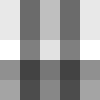

Compressão nível 1
Erro: 2.0639038137892203


In [566]:
println("Compressão nível 1")

B, C = compressao(img, 1)
compressao_1 = B * C'
erro_1 = norm(img - compressao_1)
display(Gray.(compressao_1))

println("Erro: ", erro_1)

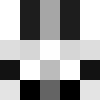

Compressão nível 2
Erro: 0.9834897575640651


In [567]:
println("Compressão nível 2")

B, C = compressao(img, 2)
compressao_2 = B * C'
erro_2 = norm(img - compressao_2)
display(Gray.(compressao_2))

println("Erro: ", erro_2)

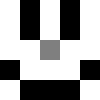

Compressão nível 3
Erro: 5.00617706849582e-16


In [568]:
println("Compressão nível 3")

B, C = compressao(img, 3)
compressao_3 = B * C'
erro_3 = norm(img - compressao_3)
display(Gray.(compressao_3))

println("Erro: ", erro_3)

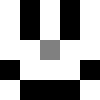

Compressão nível 4
Erro: 2.38880370106495e-16


In [569]:
println("Compressão nível 4")

B, C = compressao(img, 4)
compressao_4 = B * C'
erro_4 = norm(img - compressao_4)
display(Gray.(compressao_4))

println("Erro: ", erro_4)

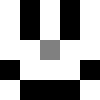

Compressão nível 5
Erro: 2.8922668140437335e-16


In [570]:
println("Compressão nível 5")

B, C = compressao(img, 5)
compressao_5 = B * C'
erro_5 = norm(img - compressao_5)
display(Gray.(compressao_5))

println("Erro: ", erro_5)

## Exercício 8

Encontre (ou desenhe) uma imagem A, com mais ou menos 200 x 200 pixels (pode ser um pouco maior), que

a) Exija um nível de compressão maior que 3 e menor que 6 para recuperar pelo menos 99% de sua norma total.

b) Exija um nível de compressão maior que 40 para recuperar pelo menos 99% de sua norma total

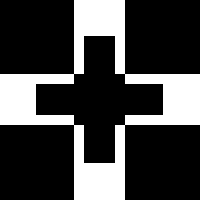

4

In [571]:
# a) Nível de compressão maior que 3 e menor que 6

img = zeros(200, 200)
img[75:125, :] .= 1
img[:, 75:125] .= 1
img[75:125, 75:125] .= 0
img[85:115, 37:163] .= 0
img[37:163, 85:115] .= 0

raw = img
img = Gray.(img)
display(img)

rank(raw)

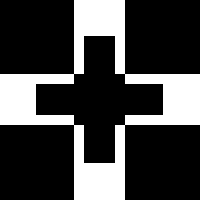

Compressão de nível 4
Erro: 7.52817793633062e-14
Porcentagem da Norma: 100.00%


In [572]:
nivel_de_compressao = 4

println("Compressão de nível ", nivel_de_compressao)

B, C = compressao(raw, nivel_de_compressao)
img_comprimida = B * C'
erro = norm(Gray.(img) - img_comprimida)
display(Gray.(img_comprimida))

println("Erro: ", erro)
@printf("Porcentagem da Norma: %.2f%%\n", norm(img_comprimida) * 100 / norm(raw))

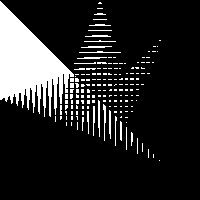

148

In [573]:
# b) Nível de compressão maior que 40

img = zeros(200, 200)
m, n = size(img)
for i=1:m
    for j=1:n
        img[i, j] = i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
        img[j, i] -= i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
        img[n-j+1, i] *= i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
        img[j, m-i+1] -= i > n/2 + sin(j/5*100)*n/5 * j/100 ? 0.0 : 1.0;
    end
end
        

raw = img
img = Gray.(img)
display(img)

rank(raw)

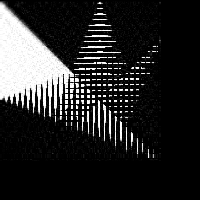

Compressão de nível 43
Erro: 11.942023353826048
Porcentagem da Norma: 99.03%


In [574]:
nivel_de_compressao = 43

println("Compressão de nível ", nivel_de_compressao)

B, C = compressao(raw, nivel_de_compressao)
img_comprimida = B * C'
erro = norm(Gray.(img) - img_comprimida)
display(Gray.(img_comprimida))

println("Erro: ", erro)
@printf("Porcentagem da Norma: %.2f%%\n", norm(img_comprimida) * 100 / norm(raw))

In [575]:
norm(img_comprimida)

84.99051757823736

In [576]:
norm(raw)

85.82540416450132